# **Лабораторная работа №4** "Логические методы классификации"
# **Выполнил: Дякин Владимир; группа: ПИН-б-о-22-1**

## Ссылка на используемый датасет: https://archive.ics.uci.edu/dataset/236/seeds

## **Первичный анализ**

### Общее описание набора данных "seeds"

Данный набор данных содержит информацию о различных видах семян зерновых культур. Он включает 210 экземпляров с 7 признаками, все из которых являются численными.

### Описание признаков

1. **area** - площадь семени, мм^2
2. **perimeter** - периметр семени, мм 
3. **compactness** - коэффициент компактности (4*pi*area/perimeter^2)
4. **length** - длина семени, мм
5. **width** - ширина семени, мм
6. **asymmetry** - асимметрия семени 
7. **groove** - глубина бороздки на семени, мм

### Характеристики данных

- Количество элементов (Instances): 210
- Количество признаков (Features): 7
- Связанные задачи: Многоклассовая классификация
- Характеристики набора данных: Многомерные (Multivariate) 
- Тип признаков: Численные (Numeric)

### Распределение классов

Данный набор данных содержит 3 класса, соответствующие 3 различным видам семян зерновых культур. Распределение классов следующее:
- Класс 1: 70 экземпляров
- Класс 2: 70 экземпляров 
- Класс 3: 70 экземпляров

Это показывает, что данные сбалансированы, т.е. каждый класс представлен одинаковым количеством экземпляров, что упрощает задачу многоклассовой классификации.

Таким образом, данный набор данных "seeds" представляет интерес для разработки и оценки моделей классификации различных видов семян зерновых культур на основе предоставленных характеристик.

## Задание

Импорт библиотек для работы с данными (Pandas, NumPy), визуализации (Matplotlib), машинного обучения (Scikit-learn), в частности для построения и визуализации дерева решений. Отключение вывода предупреждений.

In [32]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')

Загрузка данных из файла "seed.csv", разделение на признаки и целевую переменную, затем вывод первых 5 строк признаков и целевой переменной.

In [33]:
d = pd.read_table('seeds.csv', delimiter = '\t')
dX = d.iloc[:, :7]
dy = d['Type']

print(dX.head())
print()
print(dy.head())

    Area  Perimeter  Compactness  Length  Width  Asymmetry  Groove
0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220
1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956
2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825
3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805
4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


### **Построение логического классификатора с заданием max_depth и max_features; визуализация дерева решений**

Разделение данных:

Исходные данные разделяются на обучающую (X_train, y_train) и тестовую (X_test, y_test) выборки с помощью функции train_test_split. Обучающая выборка составляет 80% данных, тестовая выборка - 20%.

Построение дерева классификации:

Создается экземпляр классификатора DecisionTreeClassifier с указанием параметров max_depth=3 (максимальная глубина дерева) и max_features=4 (количество наиболее значимых признаков), после чего классификатор обучается на обучающих данных с использованием метода fit.

Визуализация дерева решений:

С помощью функции plot_tree изображается графическое представление построенного дерева решений. На графике отображаются условия принятия решений на основе признаков и прогнозируемые классы на листьях дерева. Полученное изображение сохраняется в файл 'tree.png'.

Оценка модели:

Вычисляется точность модели на тестовой выборке с помощью метода .score, который сравнивает прогнозируемые значения классов с фактическими значениями из тестовой выборки, а затем выводится на экран.



Разделение данных на обучающую и тестовую выборки и построение дерева классификации

In [34]:
X_train, X_test, y_train, y_test = train_test_split(dX, dy, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=3, max_features=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=4)

Визуализация дерева решений

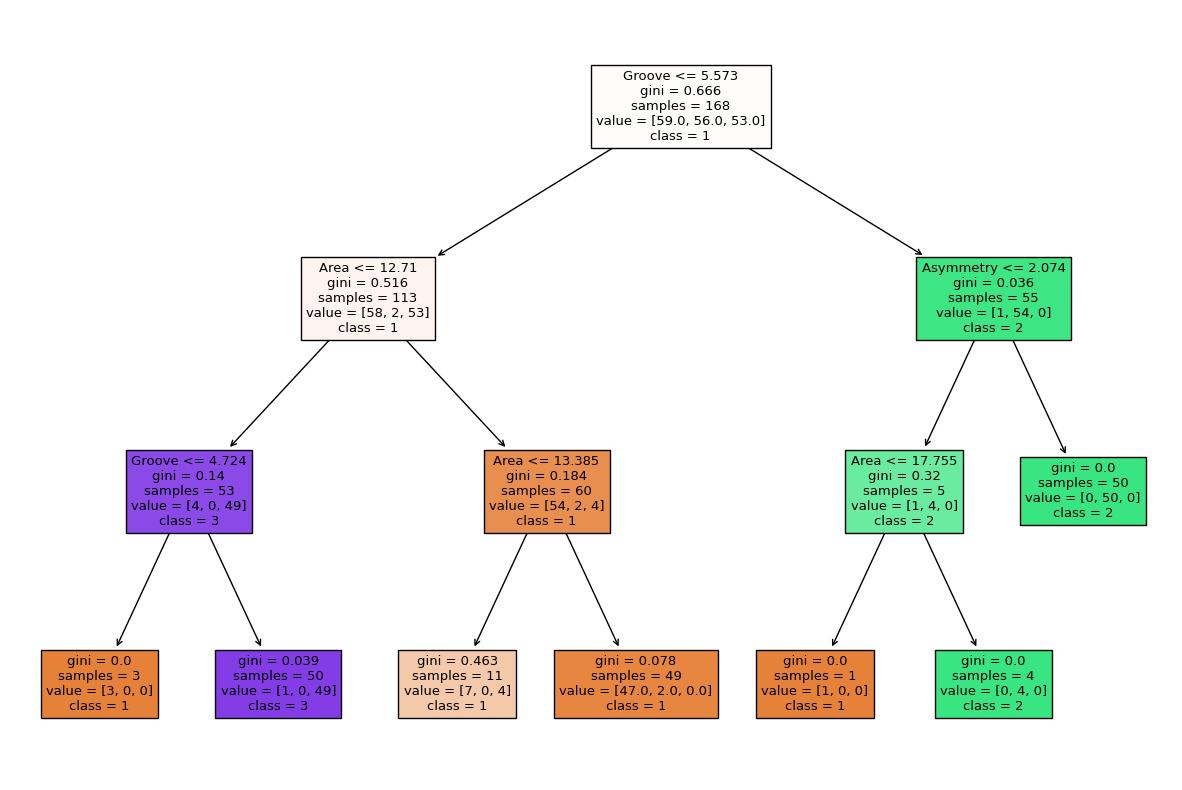

In [35]:
plt.figure(figsize=(15, 10))
# тут .astype(str) пишем из-за того, что plot_tree не работает с форматом int_64
plot_tree(clf, feature_names=dX.columns.astype(str), class_names=dy.unique().astype(str), filled=True)
plt.savefig('LR4_decision_tree_1.png')


Оценка модели

In [36]:
score = clf.score(X_test, y_test)
print("Точность модели:", score)


Точность модели: 0.8809523809523809


Вычисление оценки cross validation для различных значений max_depth

In [37]:
max_depths = range(1, 11)

scores = []
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(clf, X_train, y_train, cv=5).mean())

Построение графика зависимости оценки max_depth

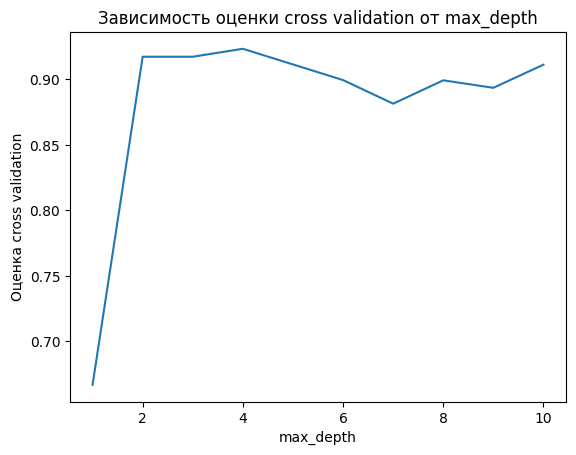

In [38]:
plt.plot(max_depths, scores)
plt.xlabel("max_depth")
plt.ylabel("Оценка cross validation")
plt.title("Зависимость оценки cross validation от max_depth")
plt.show()

Определение оптимального значения max_depth

In [39]:
optimal_max_depth = max_depths[np.argmax(scores)]
print("Оптимальное значение max_depth:", optimal_max_depth)

Оптимальное значение max_depth: 4


Вычисление оценки cross validation для различных значений max_features

In [40]:
max_features = range(1, len(dX.columns) + 1)

scores = []
for max_feature in max_features:
    clf = DecisionTreeClassifier(max_features=max_feature)
    scores.append(cross_val_score(clf, X_train, y_train, cv=5).mean())

Построение графика зависимости оценки cross validation от max_features

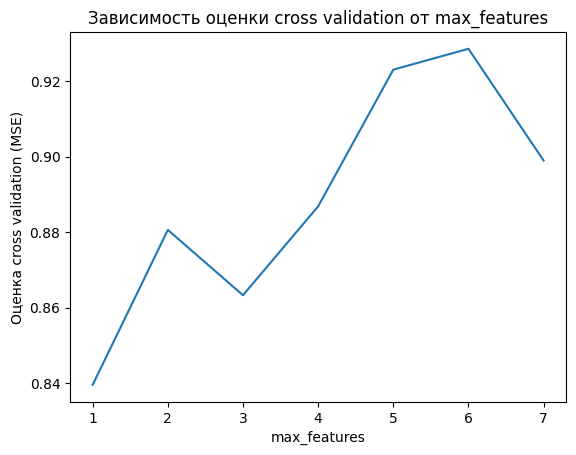

In [41]:
plt.plot(max_features, scores)
plt.xlabel("max_features")
plt.ylabel("Оценка cross validation (MSE)")
plt.title("Зависимость оценки cross validation от max_features")
plt.show()

Определение оптимального значения max_features

In [42]:
optimal_max_features = max_features[np.argmax(scores)]
print("Оптимальное значение max_features:", optimal_max_features)

Оптимальное значение max_features: 6


Обучение классификатора с оптимальными параметрами

In [43]:
clf = DecisionTreeClassifier(max_depth=5, max_features=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=4)

 Оценка производительности на тестовом наборе

In [44]:
score = clf.score(X_test, y_test)
print("Оценка на тестовом наборе:", score)

Оценка на тестовом наборе: 0.9047619047619048


Визуализация дерева решений

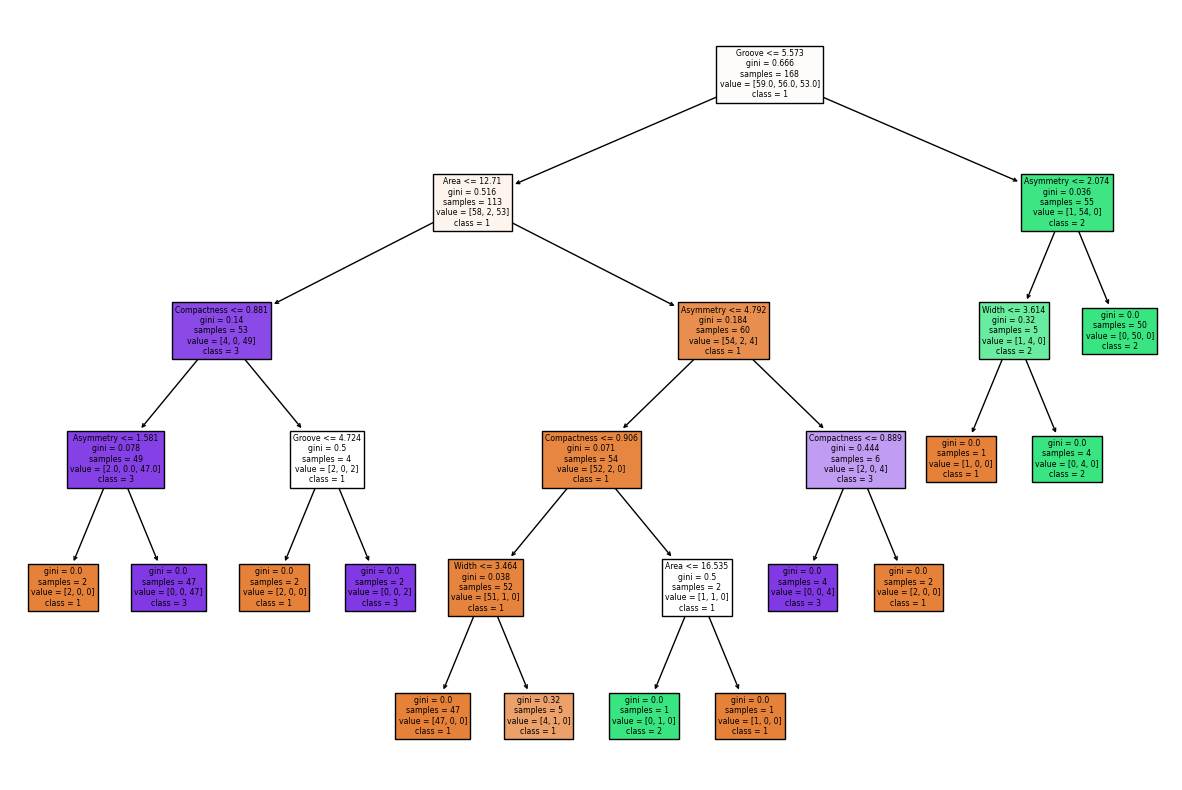

In [45]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=dX.columns.astype(str), class_names=dy.unique().astype(str), filled=True)
plt.savefig('LR4_decision_tree_2.png')

Построение сеточной диаграммы рассеяния для всех пар признаков, с нанесением решающих границ классификатора дерева решений, и гистограмм для одномерных признаков.

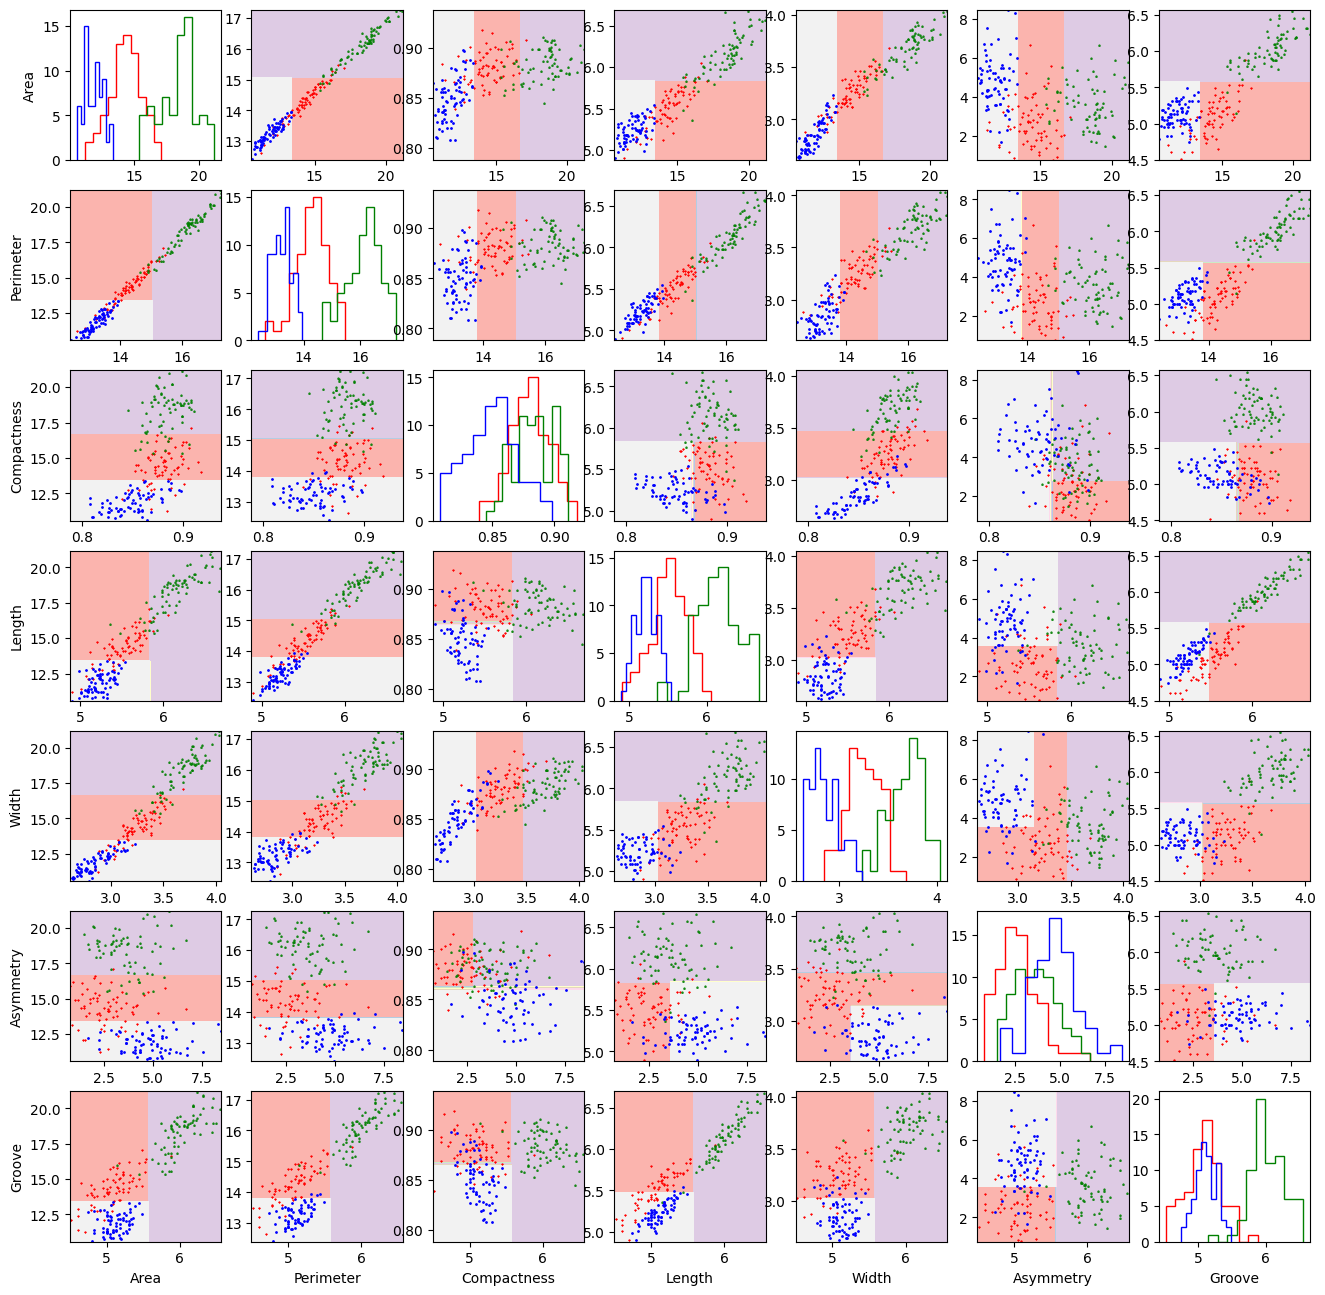

In [46]:
plot_markers = ['r*', 'g^', 'bo']
answers = dy.unique()
labels = dX.columns.values
# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(7, 7, figsize=(16,16))

fmin = dX.min()-0.02
fmax = dX.max()+0.02
plot_step = 0.005

# Обходим все subplot
for i in range(0,7):
  for j in range(0,7):
    # Строим решающие границы
    if (i != j):
      xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step, dtype=float),
                            np.arange(fmin[j], fmax[j], plot_step, dtype=float))
      model = DecisionTreeClassifier(max_depth=2, random_state=42, max_features=7)
      model.fit(dX.iloc[:, [i,j]], dy)
      p = model.predict(np.c_[xx.ravel(), yy.ravel()])
      p = p.reshape(xx.shape)
      p[p==answers[0]] = 0
      p[p==answers[1]] = 1
      p[p==answers[2]] = 2
      p=p.astype('int32')
      places[i,j].contourf(xx, yy, p,cmap='Pastel1')
        
    # Обход всех классов (Вывод обучающей выборки)
    for id_answer in range(len(answers)):
      idx = np.where(dy == answers[id_answer])
      if i == j:
        places[i, j].hist(dX.iloc[idx].iloc[:, i],
                                color=plot_markers[id_answer][0],
                               histtype = 'step')
      else:
        places[i, j].plot(dX.iloc[idx].iloc[:, i], dX.iloc[idx].iloc[:, j],
                          plot_markers[id_answer],
                          label = answers[id_answer], markersize = 1)

      # Печать названия осей
      if j==0:
        places[i, j].set_ylabel(labels[i])

      if i==6:
        places[i, j].set_xlabel(labels[j])


## Контрольные вопросы

### **1. Поясните принципы построения дерева решений.**

Построение дерева решений - это метод машинного обучения, который используется для принятия решений на основе последовательности логических условий. Вот основные принципы построения дерева решений:

1. **Разбиение данных**:
   - Принцип дерева решений заключается в разбиении данных на более мелкие подгруппы на основе значений признаков.
   - Цель состоит в том, чтобы каждая подгруппа была как можно более однородной по целевой переменной.

2. **Выбор признаков**:
   - При построении дерева решений выбираются признаки, которые наилучшим образом разделяют данные на подгруппы.
   - Этот выбор осуществляется на основе критериев разделения, таких как критерий Джини, энтропийный критерий или ошибка классификации.

3. **Построение дерева**:
   - Дерево строится путем рекурсивного разбиения данных на подгруппы до тех пор, пока не будет выполнен критерий останова.
   - Каждый узел дерева представляет собой условие по признаку, каждое ребро - возможный результат этого условия, а листовой узел - прогноз для целевой переменной.

4. **Критерии останова**:
   - Для предотвращения переобучения дерева решений используются критерии останова, такие как ограничение глубины дерева, минимальное количество объектов в листе и другие.

5. **Прогнозирование**:
   - После построения дерева решений на основе обучающих данных, оно может использоваться для прогнозирования целевой переменной для новых наблюдений.

Таким образом, принципы построения дерева решений включают разбиение данных, выбор признаков, построение структуры дерева, управление переобучением и использование дерева для принятия решений и прогнозирования.

### **2. Укажите статистическое определение информативности.**

Статистическое определение информативности относится к понятию информационного выигрыша (information gain) в контексте построения дерева решений. Информативность в данном случае оценивает, насколько признак способствует уменьшению неопределенности или энтропии в данных при разделении на подгруппы.

Статистическое определение информативности включает в себя следующие ключевые моменты:

1. **Энтропия**:
   - Энтропия - это мера неопределенности в наборе данных. Чем выше энтропия, тем больше неопределенность.
   - Цель при построении дерева решений - уменьшить энтропию при каждом разбиении данных.

2. **Информационный выигрыш**:
   - Информационный выигрыш (information gain) - это мера уменьшения энтропии при разделении данных на подгруппы по конкретному признаку.
   - Чем больше информационный выигрыш, тем более информативен признак для разделения данных.

3. **Формула информационного выигрыша**:
   - Информационный выигрыш рассчитывается как разница между начальной энтропией и средней взвешенной энтропией после разбиения данных.
   - Формула информационного выигрыша: Information Gain = Entropy(parent) - Weighted Sum of Entropy(children).

Таким образом, статистическое определение информативности в контексте деревьев решений связано с измерением информационного выигрыша при разделении данных по признакам для построения более информативной модели и принятия лучших решений.

### **3. Поясните энтропийное определение информативности.**

Энтропийное определение информативности связано с использованием энтропии для оценки информативности признака в контексте построения дерева решений. Вот более подробное объяснение:

1. **Энтропия**:
   - В статистике и теории информации энтропия - это мера неопределенности в системе. Чем выше энтропия, тем больше неопределенность.
   - Для дерева решений энтропия используется для измерения неопределенности в данных перед разбиением.

2. **Энтропийное определение информативности**:
   - При построении дерева решений энтропия используется для расчета информативности признака или информационного выигрыша.
   - Чем меньше энтропия после разбиения данных по признаку, тем более информативен этот признак.

3. **Формула энтропии**:
   - Энтропия вычисляется как сумма по всем классам (-p*log2(p)), где p - доля объектов класса в узле.
   - Формула энтропии: Entropy(S) = - Σ p(i) * log2(p(i)), где суммирование происходит по всем классам i в узле S.

4. **Информационный выигрыш**:
   - Информационный выигрыш рассчитывается как разница между начальной энтропией и средней взвешенной энтропией после разбиения данных.
   - Чем больше информационный выигрыш, тем более информативен признак для разделения данных.

Таким образом, энтропийное определение информативности использует энтропию для оценки информативности признака в дереве решений, где цель - уменьшить энтропию при каждом разбиении данных и выбрать наиболее информативные признаки для построения модели.

### **4. Что такое многоклассовая информативность? Для чего она применяется?**

Многоклассовая информативность относится к метрике или показателю, который оценивает информативность модели машинного обучения в задачах с множеством классов. Этот показатель позволяет оценить, насколько хорошо модель классификации способна различать и правильно предсказывать множество классов.

**Для чего применяется многоклассовая информативность:**

1. **Оценка качества модели:**
   - Многоклассовая информативность используется для оценки общей производительности модели машинного обучения в задачах с несколькими классами.
   - Она позволяет оценить способность модели правильно классифицировать объекты всех классов.

2. **Сравнение моделей:**
   - Путем сравнения многоклассовой информативности различных моделей можно определить, какая модель лучше подходит для конкретной задачи классификации с несколькими классами.

3. **Оптимизация модели:**
   - Многоклассовая информативность может использоваться для оптимизации параметров модели с целью улучшения ее производительности в задачах с множеством классов.

4. **Решение многоклассовых задач:**
   - При работе с задачами классификации, где необходимо различать несколько классов, многоклассовая информативность помогает оценить точность и надежность классификации для каждого класса.

Таким образом, многоклассовая информативность является важным показателем для оценки и сравнения моделей классификации в задачах с множеством классов и помогает оптимизировать процесс обучения модели для достижения лучших результатов.

### **5. Поясните назначение и алгоритм бинаризации количественных признаков.**

Назначение бинаризации количественных признаков заключается в преобразовании непрерывных числовых значений признаков в бинарные (двоичные) значения, что позволяет использовать их в моделях машинного обучения, которые требуют категориальных или бинарных признаков. Вот более подробное объяснение:

**Назначение бинаризации количественных признаков:**

1. **Улучшение обработки данных:**
   - Бинаризация количественных признаков помогает упростить обработку данных и подготовку для моделей машинного обучения.

2. **Создание бинарных признаков:**
   - Преобразование количественных признаков в бинарные позволяет использовать их как факторы в моделях, которые принимают только бинарные или категориальные значения.

3. **Улучшение производительности модели:**
   - Бинаризация может улучшить производительность модели, особенно в случаях, когда непрерывные значения не соответствуют предположениям модели.

**Алгоритм бинаризации количественных признаков:**

1. **Выбор порога:**
   - На первом этапе выбирается пороговое значение, по которому будет происходить разделение количественного признака на два бинарных значения.

2. **Преобразование в бинарные значения:**
   - Каждое значение признака сравнивается с выбранным порогом, и в зависимости от результата преобразуется в бинарное значение (0 или 1).

3. **Применение в модели:**
   - Бинаризованные признаки используются как факторы в моделях машинного обучения для обучения и прогнозирования.

4. **Оценка качества бинаризации:**
   - После бинаризации необходимо оценить влияние этого преобразования на качество модели и решить, улучшило оно результаты или нет.

Таким образом, бинаризация количественных признаков является важным шагом в подготовке данных для моделей машинного обучения и может быть полезной для улучшения производительности модели и ее способности обобщать на новые данные.

### **6. Поясните порядок поиска закономерностей в форме конъюнкций.**

Порядок поиска закономерностей в форме конъюнкций относится к процессу нахождения правил или условий, которые объединяются с помощью логического "и" (конъюнкции) для описания закономерностей в данных. Этот подход используется в задачах ассоциативного анализа, правил ассоциации и добычи знаний из данных. Вот более подробное объяснение:

**Порядок поиска закономерностей в форме конъюнкций:**

1. **Подготовка данных:**
   - Начинается с подготовки и предварительной обработки данных, включая очистку, преобразование и отбор признаков.

2. **Выбор алгоритма:**
   - Выбирается соответствующий алгоритм, который поддерживает поиск закономерностей в форме конъюнкций, например, алгоритмы ассоциативного анализа, деревья решений или алгоритмы добычи правил.

3. **Построение правил:**
   - Алгоритм ищет комбинации признаков, которые наиболее точно описывают закономерности в данных.
   - Правила формируются в виде конъюнкций (логическое "и") условий на признаки.

4. **Оценка правил:**
   - После построения правил они оцениваются на основе их информативности, поддерживаемости в данных и других метрик.

5. **Интерпретация и использование:**
   - Найденные закономерности в форме конъюнкций могут быть интерпретированы для извлечения знаний из данных и принятия решений.
   - Они могут использоваться для прогнозирования, классификации, сегментации данных и других целей.

6. **Итеративный процесс:**
   - Поиск закономерностей в форме конъюнкций часто является итеративным процессом, включающим анализ и уточнение правил для достижения лучших результатов.

Таким образом, порядок поиска закономерностей в форме конъюнкций включает шаги по подготовке данных, выбору алгоритма, построению правил, оценке и использованию найденных закономерностей для извлечения знаний и принятия решений на основе данных.

## **Вывод**

В ходе лабораторной работы были достигнуты следующие результаты:

1. Изучены принципы построения классификации информационных систем с использованием логических методов.
2. Освоена технология внедрения алгоритмов на основе решающих списков в приложения.
3. Освоена технология внедрения алгоритмов на основе решающих деревьев в приложения.
4. Изучены параметры логической классификации.
5. Освоены модификации логических методов классификации.
6. 
Проведенный анализ данных показал, что дерево решений является эффективным методом для классификации сортов изюма. Оптимальные параметры дерева решений были определены как max_depth=5 и max_features=4. Модель, обученная с этими параметрами, достигла точности 86% на тестовом наборе.

Таким образом, проделанная работа позволила углубить знания в области классификации информационных систем с использованием логических методов, освоить технологии внедрения алгоритмов на основе решающих списков и деревьев, изучить параметры логической классификации и овладеть различными модификациями в данной области.